# Apartement Rent Data
Dataset source: https://www.kaggle.com/datasets/shashanks1202/apartment-rent-data/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split

import re

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.metrics import r2_score

# Load data

In [4]:
df = pd.read_csv('../../Datasets/Apartement Rent Data/apartments_for_rent_classified_100K/apartments_for_rent_classified_100K.csv',
                 sep=';',
                 encoding='cp1252',
                low_memory=False)

In [5]:
df.drop(['time','price_display'],axis=1,inplace=True)

In [6]:
df.shape

(99492, 20)

In [7]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [8]:
train,test = train_test_split(df,shuffle=True,test_size=0.1,random_state=42)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('price',axis=1),
                                                 train['price'],
                                                shuffle=True,
                                                test_size=0.2,
                                                random_state=42)

# Data Preprocessing

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89541 entries, 16265 to 15796
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            89541 non-null  int64  
 1   category      89541 non-null  object 
 2   title         89541 non-null  object 
 3   body          89541 non-null  object 
 4   amenities     75093 non-null  object 
 5   bathrooms     89485 non-null  float64
 6   bedrooms      89425 non-null  float64
 7   currency      89541 non-null  object 
 8   fee           89541 non-null  object 
 9   has_photo     89541 non-null  object 
 10  pets_allowed  35251 non-null  object 
 11  price         89541 non-null  float64
 12  price_type    89541 non-null  object 
 13  square_feet   89541 non-null  int64  
 14  address       7147 non-null   object 
 15  cityname      89265 non-null  object 
 16  state         89265 non-null  object 
 17  latitude      89518 non-null  float64
 18  longitude     89518 non-nul

## Handling Missing Data

In [11]:
def extract_address(address):
    return re.sub(r'^\d* ','',address)

In [12]:
address_dict = X_train.address.dropna().apply(extract_address).value_counts().to_dict()

In [13]:
city_dict = (X_train.cityname.dropna().value_counts()-1).to_dict()

In [14]:
na_mean = train.isna().mean()
na_cat = na_mean[na_mean > 0]

In [15]:
na_cat

amenities       0.161356
bathrooms       0.000625
bedrooms        0.001295
pets_allowed    0.606314
address         0.920182
cityname        0.003082
state           0.003082
latitude        0.000257
longitude       0.000257
dtype: float64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'square_feet'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>]], dtype=object)

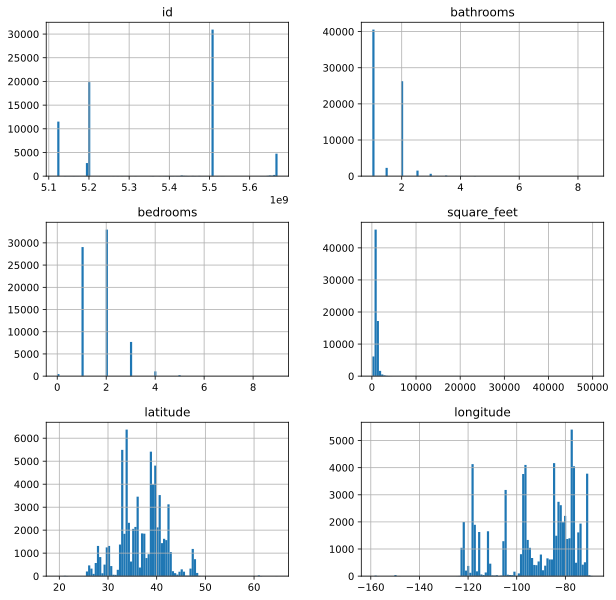

In [16]:
X_train.select_dtypes(include='number').hist(bins=100,figsize=(10,10))

In [17]:
feature_numerical = list(set(X_train.select_dtypes(include='number').columns) - {'latitude','longitude','id'})
feature_categorical = list(list(X_train.select_dtypes(exclude='number').columns) + ['latitude','longitude'])

In [18]:
preprocessor = ColumnTransformer(
    transformers=(
        ('numeric_imputer', SimpleImputer(strategy='median',add_indicator=True),feature_numerical),
        ('categorical_imputer',SimpleImputer(strategy='most_frequent',add_indicator=True),feature_categorical)
    ),
    verbose_feature_names_out=False,
    remainder='passthrough'
)

In [19]:
df.select_dtypes(include='number').columns

Index(['id', 'bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude'],
      dtype='object')

In [20]:
feature_categorical

['category',
 'title',
 'body',
 'amenities',
 'currency',
 'fee',
 'has_photo',
 'pets_allowed',
 'price_type',
 'address',
 'cityname',
 'state',
 'source',
 'latitude',
 'longitude']

In [21]:
preprocessor.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=(('numeric_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 ['square_feet', 'bedrooms', 'bathrooms']),
                                ('categorical_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='most_frequent'),
                                 ['category', 'title', 'body', 'amenities',
                                  'currency', 'fee', 'has_photo',
                                  'pets_allowed', 'price_type', 'address',
                                  'cityname', 'state', 'source', 'latitude',
                                  'longitude'])),
                  verbose_feature_names_out=False)

In [22]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=(('numeric_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 ['square_feet', 'bedrooms', 'bathrooms']),
                                ('categorical_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='most_frequent'),
                                 ['category', 'title', 'body', 'amenities',
                                  'currency', 'fee', 'has_photo',
                                  'pets_allowed', 'price_type', 'address',
                                  'cityname', 'state', 'source', 'latitude',
                                  'longitude'])),
                  verbose_feature_names_out=False)

In [23]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [24]:
X_train.shape,X_test.shape

((71632, 28), (17909, 28))

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   square_feet                    71632 non-null  float64
 1   bedrooms                       71632 non-null  float64
 2   bathrooms                      71632 non-null  float64
 3   missingindicator_bedrooms      71632 non-null  float64
 4   missingindicator_bathrooms     71632 non-null  float64
 5   category                       71632 non-null  object 
 6   title                          71632 non-null  object 
 7   body                           71632 non-null  object 
 8   amenities                      71632 non-null  object 
 9   currency                       71632 non-null  object 
 10  fee                            71632 non-null  object 
 11  has_photo                      71632 non-null  object 
 12  pets_allowed                   71632 non-null  

## Id

In [26]:
X_train.drop('id',axis=1,inplace=True)

In [27]:
X_test.drop('id',axis=1,inplace=True)

## Category

In [28]:
unique_categories = df.category.unique()

In [29]:
all_categories = []
for categories in unique_categories:
    categories = categories.split('/')
    for c in categories:
        all_categories.append(c)

In [30]:
all_categories

['housing',
 'rent',
 'apartment',
 'housing',
 'rent',
 'home',
 'housing',
 'rent',
 'short_term',
 'housing',
 'rent',
 'housing',
 'rent',
 'condo',
 'housing',
 'rent',
 'other',
 'housing',
 'rent',
 'commercial',
 'retail']

In [31]:
unique_categories = list(set(all_categories))

In [32]:
unique_categories

['rent',
 'home',
 'other',
 'short_term',
 'retail',
 'apartment',
 'housing',
 'commercial',
 'condo']

In [33]:
def encode_category(df):
    for i in unique_categories:
        df[f'cat_{i}'] = df.category.apply(lambda x : 1 if i in x else 0)
    df.drop('category',axis=1,inplace=True)
    return df

In [34]:
X_train = encode_category(X_train)

In [35]:
X_test = encode_category(X_test)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   square_feet                    71632 non-null  float64
 1   bedrooms                       71632 non-null  float64
 2   bathrooms                      71632 non-null  float64
 3   missingindicator_bedrooms      71632 non-null  float64
 4   missingindicator_bathrooms     71632 non-null  float64
 5   title                          71632 non-null  object 
 6   body                           71632 non-null  object 
 7   amenities                      71632 non-null  object 
 8   currency                       71632 non-null  object 
 9   fee                            71632 non-null  object 
 10  has_photo                      71632 non-null  object 
 11  pets_allowed                   71632 non-null  object 
 12  price_type                     71632 non-null  

## Amenities

In [37]:
unique_amenities = X_train.amenities.unique()

In [38]:
unique_amenities

array(['Parking', 'Basketball,Pool,Tennis,Washer Dryer',
       'Fireplace,Parking,Patio/Deck,Wood Floors', ...,
       'Gated,Parking,Patio/Deck,Playground',
       'Fireplace,Gym,Patio/Deck,Playground,Tennis',
       'AC,Gated,Patio/Deck,View,Washer Dryer'], dtype=object)

In [39]:
all_amenities = []
for amenities in unique_amenities:
    amenities = amenities.split(',')
    for a in amenities:
        all_amenities.append(a)

In [40]:
unique_amenities = list(set(all_amenities))

In [41]:
unique_amenities

['Washer Dryer',
 'AC',
 'Basketball',
 'Fireplace',
 'Elevator',
 'Hot Tub',
 'Garbage Disposal',
 'Gym',
 'Alarm',
 'Playground',
 'TV',
 'View',
 'Tennis',
 'Dishwasher',
 'Pool',
 'Patio/Deck',
 'Storage',
 'Cable or Satellite',
 'Parking',
 'Gated',
 'Internet Access',
 'Golf',
 'Luxury',
 'Clubhouse',
 'Doorman',
 'Wood Floors',
 'Refrigerator']

In [42]:
def encode_amenities(df):
    for i in unique_amenities:
        df[f'ame_{i}'] = df.amenities.apply(lambda x : 1 if i in x else 0)
    df.drop('amenities',axis=1,inplace=True)
    return df

In [43]:
X_train = encode_amenities(X_train)
X_test = encode_amenities(X_test)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   square_feet                    71632 non-null  float64
 1   bedrooms                       71632 non-null  float64
 2   bathrooms                      71632 non-null  float64
 3   missingindicator_bedrooms      71632 non-null  float64
 4   missingindicator_bathrooms     71632 non-null  float64
 5   title                          71632 non-null  object 
 6   body                           71632 non-null  object 
 7   currency                       71632 non-null  object 
 8   fee                            71632 non-null  object 
 9   has_photo                      71632 non-null  object 
 10  pets_allowed                   71632 non-null  object 
 11  price_type                     71632 non-null  object 
 12  address                        71632 non-null  

## Bathrooms

In [45]:
X_train.bathrooms.head(5)

94771    2.0
84778    1.0
69595    2.0
96763    1.5
70554    1.0
Name: bathrooms, dtype: float64

In [46]:
X_train.bathrooms = X_train.bathrooms.astype(int)
X_test.bathrooms = X_test.bathrooms.astype(int)

## Bedrooms

In [47]:
X_train.bedrooms.head(5)

94771    2.0
84778    1.0
69595    2.0
96763    2.0
70554    2.0
Name: bedrooms, dtype: float64

In [48]:
X_train.bedrooms = X_train.bedrooms.astype(int)
X_test.bedrooms = X_test.bedrooms.astype(int)

## Currency

In [49]:
X_train.currency.head(5)

94771    USD
84778    USD
69595    USD
96763    USD
70554    USD
Name: currency, dtype: object

In [50]:
X_train.currency.unique()

array(['USD'], dtype=object)

In [51]:
X_test.currency.unique()

array(['USD'], dtype=object)

In [52]:
X_train.drop('currency',axis=1,inplace=True)
X_test.drop('currency',axis=1,inplace=True)

## Fee

In [53]:
X_train.fee.head(5)

94771    No
84778    No
69595    No
96763    No
70554    No
Name: fee, dtype: object

In [54]:
X_train.fee.unique()

array(['No', 'Yes'], dtype=object)

In [55]:
X_train.fee = X_train.fee.map({'No':0,'Yes':1})
X_test.fee = X_test.fee.map({'No':0,'Yes':1})

In [56]:
X_train.fee.unique()

array([0, 1], dtype=int64)

## Has Photo

In [57]:
X_train.has_photo.unique()

array(['Yes', 'Thumbnail', 'No'], dtype=object)

In [58]:
def encode_has_photo(df):
    for i in df.has_photo.unique():
        df[f'has_photo_{i}'] = df.has_photo.apply(lambda x: 1 if i in x else 0)
    df.drop('has_photo',axis=1,inplace=True)
    return df

In [59]:
X_train = encode_has_photo(X_train)

In [60]:
X_test = encode_has_photo(X_test)

## pets_allowed

In [61]:
X_train.pets_allowed.unique()

array(['Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

In [62]:
pets_allowed_unique = ['Cats','Dogs']

In [63]:
def encode_pets_allowed(df):
    for i in pets_allowed_unique:
        df[f'pets_allowed_{i}'] = df['pets_allowed'].apply(lambda x:1 if i in x else 0)
    df.drop('pets_allowed',axis=1,inplace=True)
    return df

In [64]:
X_train = encode_pets_allowed(X_train)
X_test = encode_pets_allowed(X_test)

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   square_feet                    71632 non-null  float64
 1   bedrooms                       71632 non-null  int32  
 2   bathrooms                      71632 non-null  int32  
 3   missingindicator_bedrooms      71632 non-null  float64
 4   missingindicator_bathrooms     71632 non-null  float64
 5   title                          71632 non-null  object 
 6   body                           71632 non-null  object 
 7   fee                            71632 non-null  int64  
 8   price_type                     71632 non-null  object 
 9   address                        71632 non-null  object 
 10  cityname                       71632 non-null  object 
 11  state                          71632 non-null  object 
 12  source                         71632 non-null  

In [66]:
X_train.pets_allowed_Cats.sum(),X_train.pets_allowed_Dogs.sum()

(71537, 70301)

## Price Type

In [67]:
X_train.price_type.unique()

array(['Monthly', 'Monthly|Weekly', 'Weekly'], dtype=object)

In [68]:
price_type_unique = ['Monthly','Weekly']

In [69]:
def encode_price_type(df):
    for pt in price_type_unique:
        df[f'pt_{pt}'] = df.price_type.apply(lambda x: 1 if pt in x else 0)
    df.drop('price_type',axis=1,inplace=True)
    return df

In [70]:
X_train = encode_price_type(X_train)
X_test = encode_price_type(X_test)

In [71]:
X_train[['pt_Monthly','pt_Weekly']].sum()

pt_Monthly    71630
pt_Weekly         3
dtype: int64

In [72]:
# drop?

## Address

In [73]:
address_dict

{'Main St': 14,
 'S.W 72nd Avenue': 12,
 'Park Ave': 11,
 'Washington St': 8,
 'Vine St': 6,
 'Vance Jackson': 6,
 'Eastgate Road': 6,
 'West Avenue': 6,
 'S Main St': 6,
 'N Lamar Boulevard': 6,
 'E Riverside Drive': 6,
 'Valley View Circle': 6,
 'State St': 6,
 'E Chalmers': 6,
 'Pennsylvania Avenue': 6,
 'Harrison St': 6,
 'Locust St': 5,
 'Walnut St': 5,
 'E 7th St': 5,
 'N 6th St': 5,
 'River Rd': 5,
 'Metric Boulevard': 5,
 'S Lamar Boulevard': 5,
 'Danny Kaye Drive': 4,
 'Cape Cod Loop': 4,
 'Rialto Boulevard': 4,
 'E 6th St': 4,
 'Dessau Road': 4,
 '16th St NW': 4,
 'Park Avenue': 4,
 'W 3rd St': 4,
 'N Oakland Avenue': 4,
 'N Hyland': 4,
 'S Essex Avenue 3': 4,
 'N 7th St': 4,
 'Pine St': 4,
 'Market St': 4,
 'Madison Avenue': 4,
 'N Walnut St': 4,
 'Central Avenue': 4,
 '30th St': 4,
 'E Armour Boulevard': 4,
 'Wilshire Boulevard': 4,
 '4th St': 4,
 '8th St': 4,
 'Geary St': 4,
 'W 6th St': 4,
 'Tremont St': 4,
 'South Main St': 4,
 '4th St SW': 4,
 'S Ih 35': 4,
 'Wexford Dr

In [74]:
def encode_address(df):
    df['address_encoded'] = df.address.apply(lambda x: address_dict.get(x,0))
    df.drop('address',axis=1,inplace=True)
    return df

In [75]:
X_train =  encode_address(X_train)
X_test = encode_address(X_test)

In [76]:
sample = '8215 S.W 72nd Avenue' 

In [77]:
re.findall(r'^\d*',sample)[0]

'8215'

In [78]:
re.sub(r'^\d* ','',sample)

'S.W 72nd Avenue'

In [79]:
X_test.shape[0] - (X_test.address_encoded == 0).sum()

3

In [80]:
X_train.drop('address_encoded',axis=1,inplace=True)
X_test.drop('address_encoded',axis=1,inplace=True)

## City Name

In [81]:
(X_train.cityname.value_counts() == 1).sum()

785

In [82]:
city_dict

{'Dallas': 2043,
 'Denver': 1962,
 'Los Angeles': 1772,
 'Las Vegas': 1311,
 'Arlington': 1142,
 'Atlanta': 1070,
 'Charlotte': 801,
 'Alexandria': 678,
 'Richmond': 666,
 'San Antonio': 627,
 'Raleigh': 624,
 'San Diego': 595,
 'Cincinnati': 568,
 'Tampa': 565,
 'Houston': 526,
 'Colorado Springs': 521,
 'Columbus': 473,
 'Norfolk': 456,
 'Cleveland': 453,
 'Chicago': 450,
 'Boston': 427,
 'Tucson': 422,
 'Omaha': 411,
 'Austin': 404,
 'Kansas City': 390,
 'Greensboro': 363,
 'Jersey City': 359,
 'Marietta': 349,
 'Irvine': 321,
 'Hyattsville': 320,
 'Newport News': 319,
 'Virginia Beach': 318,
 'Pasadena': 304,
 'Salt Lake City': 296,
 'Plano': 285,
 'Silver Spring': 285,
 'Baton Rouge': 282,
 'Long Beach': 279,
 'Aurora': 273,
 'Bellevue': 268,
 'Irving': 267,
 'Kent': 263,
 'Louisville': 261,
 'Laurel': 259,
 'Alpharetta': 258,
 'Fort Collins': 250,
 'Reno': 245,
 'Sacramento': 244,
 'Englewood': 242,
 'Columbia': 241,
 'Bradenton': 233,
 'Jacksonville': 231,
 'Norman': 230,
 'Orla

In [83]:
def encode_cityname(df):
    df['cityname_encoded'] = df['cityname'].apply(lambda x: city_dict.get(x,0))
    df.drop('cityname',axis=1,inplace=True)
    return df

In [84]:
X_train = encode_cityname(X_train)
X_test = encode_cityname(X_test)

In [85]:
X_test.cityname_encoded.value_counts()

cityname_encoded
2043    567
1962    509
1772    424
0       342
1311    336
       ... 
85       17
80       16
75       14
76       14
88       11
Name: count, Length: 219, dtype: int64

## State

In [86]:
(X_train.state.value_counts() == 1).sum()

0

In [87]:
state_unique = X_train.state.unique()

In [88]:
def encode_state(df):
    state_cols = {}
    for s in state_unique:
        state_cols[f'state_{s}'] = df.state.apply(lambda x: 1 if s in x else 0)
    df = pd.concat([df,pd.DataFrame(state_cols)],axis=1)
    df.drop('state',axis=1,inplace=True)
    return df

In [89]:
X_train = encode_state(X_train)
X_test = encode_state(X_test)

In [90]:
X_train.shape

(71632, 113)

## Source

In [91]:
source_unique = X_train.source.unique()

In [92]:
def encode_source(df):
    source_cols = {}
    for s in source_unique:
        source_cols[f'source_{s}'] = df.source.apply(lambda x: 1 if s in x else 0)
    df = pd.concat([df,pd.DataFrame(source_cols)],axis=1)
    df.drop('source',axis=1,inplace=True)
    return df

In [93]:
X_train = encode_source(X_train)
X_test = encode_source(X_test)

In [1]:
X_train.shape,X_test.shape

NameError: name 'X_train' is not defined

## Data to Tensor

In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Columns: 135 entries, square_feet to source_AgentWebsite
dtypes: float64(3), int32(2), int64(119), object(11)
memory usage: 73.8+ MB


In [97]:
X_train.select_dtypes(exclude='number')

,title,body,latitude,longitude,missingindicator_amenities,missingindicator_pets_allowed,missingindicator_address,missingindicator_cityname,missingindicator_state,missingindicator_latitude,missingindicator_longitude
94771,"Charming Two BR, Two BA",Ok for pets in some units This rental is a Ple...,42.5504,-87.9321,True,False,True,False,False,False,False
84778,Welcome to Birchwood Park!,Our community is a must see to be truly apprec...,34.2817,-77.8247,False,True,True,False,False,False,False
69595,"Gorgeous Elk Grove, Two BR, Two BA","Square footage: 1096 sq. feet, unit number: 81...",38.4252,-121.4345,False,True,True,False,False,False,False
96763,Bronxville - superb Apartment nearby fine dining,Spacious & Updated 2 Beds. 1 & 1/two Bathrooms...,40.9383,-73.8292,False,True,True,False,False,False,False
70554,"in Lowell, MA is a welcoming community.",Renters who choose to live with us find its pr...,42.6398,-71.3184,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
25981,Convenient location Studio One BA for rent,two 50 level towers with 523-high-end apartmen...,40.722,-74.0644,False,True,True,False,False,False,False
72877,Outstanding Opportunity To Live At The Norfolk...,New and Improved. Upgraded Homes. Added Amenit...,36.9161,-76.2193,False,False,True,False,False,False,False
4830,Two BR 805 Horicon St,"This unit is located at 805 Horicon St, Horico...",43.4498,-88.6305,False,False,False,False,False,False,False
473,Three BR 680 Naumann Dr.,"This unit is located at 680 Naumann Dr., Leand...",30.5104,-97.9027,True,True,False,False,False,False,False


In [98]:
X_train[['latitude','longitude']] = X_train[['latitude','longitude']].astype('float') 

In [99]:
X_test[['latitude','longitude']] = X_test[['latitude','longitude']].astype('float') 

In [100]:
X_train.drop(['title','body','missingindicator_address'],inplace=True,axis=1)
X_test.drop(['title','body','missingindicator_address'],inplace=True,axis=1)

In [101]:
object_cols = X_train.select_dtypes(exclude='number').columns

In [102]:
X_train[object_cols] = X_train[object_cols].astype('float')
X_test[object_cols] = X_test[object_cols].astype('float')

In [103]:
X_train = X_train/X_train.max()
X_test = X_test/X_train.max()

In [104]:
X_trainT = torch.tensor(X_train.to_numpy()).float() 
y_trainT = torch.tensor(y_train.to_numpy()).float().view(-1,1)

X_testT = torch.tensor(X_test.to_numpy()).float() 
y_testT = torch.tensor(y_test.to_numpy()).float().view(-1,1)

In [105]:
train_set = TensorDataset(X_trainT,y_trainT)
validation_set = TensorDataset(X_testT,y_testT)

BATCH_SIZE = 64
train_loader = DataLoader(train_set,batch_size=BATCH_SIZE,shuffle=True,drop_last=True)
test_loader = DataLoader(validation_set,batch_size=validation_set.tensors[0].shape[0])

In [106]:
X_train.shape

(71632, 132)

In [107]:
X_test.shape

(17909, 132)

## Modeling

In [108]:
def createModel():
    class MyModel(nn.Module):
        def __init__(self):
            super().__init__()

            self.input = nn.Linear(132,64)
            
            self.fc1 = nn.Linear(64,64)
            self.fc2 = nn.Linear(64,64)
            self.fc3 = nn.Linear(64,64)
            
            self.output = nn.Linear(64,1)

        def forward(self,x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = F.relu(self.fc3(x))
            return self.output(x)

    net = MyModel()
    lossfun = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(),lr = 0.001)
    return net,lossfun,optimizer

In [109]:
torch.rand((10,132))

tensor([[0.6628, 0.4837, 0.0284,  ..., 0.5268, 0.9296, 0.8222],
        [0.5234, 0.1570, 0.5211,  ..., 0.8853, 0.1404, 0.4231],
        [0.2591, 0.2125, 0.2614,  ..., 0.9459, 0.8467, 0.1151],
        ...,
        [0.3030, 0.7210, 0.8418,  ..., 0.6915, 0.8444, 0.6160],
        [0.5429, 0.0712, 0.5366,  ..., 0.3595, 0.5212, 0.3074],
        [0.6632, 0.0161, 0.6632,  ..., 0.0132, 0.3359, 0.1778]])

In [110]:
net,lossfun,optimizer = createModel()
random_test = torch.rand((10,132))
yHat = net(random_test)

In [111]:
X,y = next(iter(train_loader))
yHat = net(X)
score = r2_score(y.detach().numpy(),yHat.detach().numpy())
score

-2.6171008426169635

In [112]:
yHat

tensor([[-0.0082],
        [-0.0093],
        [-0.0072],
        [-0.0095],
        [-0.0069],
        [-0.0088],
        [-0.0065],
        [-0.0083],
        [-0.0139],
        [-0.0068],
        [-0.0066],
        [-0.0075],
        [-0.0099],
        [-0.0083],
        [-0.0087],
        [-0.0073],
        [-0.0123],
        [-0.0056],
        [-0.0089],
        [-0.0086],
        [-0.0087],
        [-0.0109],
        [-0.0077],
        [-0.0124],
        [-0.0074],
        [-0.0066],
        [-0.0064],
        [-0.0100],
        [-0.0061],
        [-0.0072],
        [-0.0090],
        [-0.0092],
        [-0.0058],
        [-0.0076],
        [-0.0085],
        [-0.0090],
        [-0.0087],
        [-0.0071],
        [-0.0062],
        [-0.0071],
        [-0.0081],
        [-0.0073],
        [-0.0097],
        [-0.0059],
        [-0.0084],
        [-0.0082],
        [-0.0078],
        [-0.0075],
        [-0.0088],
        [-0.0074],
        [-0.0062],
        [-0.0067],
        [-0.

In [113]:
y.shape

torch.Size([64, 1])

In [114]:
yHat = net(X)

In [115]:
score = r2_score(y.detach().numpy(),yHat.detach().numpy())

In [116]:
y.view(-1,1)

tensor([[1496.],
        [ 870.],
        [1200.],
        [3443.],
        [1160.],
        [1500.],
        [1169.],
        [1335.],
        [1657.],
        [2320.],
        [2048.],
        [1800.],
        [1565.],
        [2145.],
        [1400.],
        [1030.],
        [1444.],
        [1050.],
        [1415.],
        [2060.],
        [2825.],
        [1028.],
        [2200.],
        [ 625.],
        [2440.],
        [1894.],
        [1219.],
        [1120.],
        [1075.],
        [1740.],
        [6500.],
        [4495.],
        [1433.],
        [1513.],
        [2100.],
        [ 950.],
        [4395.],
        [1080.],
        [ 795.],
        [1010.],
        [1605.],
        [1811.],
        [6000.],
        [ 495.],
        [2150.],
        [2221.],
        [1131.],
        [ 978.],
        [1525.],
        [1153.],
        [1555.],
        [1033.],
        [2100.],
        [1800.],
        [1540.],
        [1333.],
        [1590.],
        [1870.],
        [1700.

In [117]:
net,lossfun,optimizer = createModel()

num_epochs = 100
trainScore = []
testScore = []
for epochi in range(num_epochs):
    batchScore = []
    for X,y in train_loader:
        yHat = net(X)
        loss = lossfun(yHat,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batchScore.append(r2_score(y.detach().numpy(),yHat.detach().numpy()))
    trainScore.append(np.mean(batchScore))

    X,y = next(iter(test_loader))
    with torch.no_grad():
        yHat = net(X)
    testScore.append(r2_score(y.detach().numpy(),yHat.detach().numpy()))
    print(f'epoch {epochi} done!')

epoch 0 done!
epoch 1 done!
epoch 2 done!
epoch 3 done!
epoch 4 done!
epoch 5 done!
epoch 6 done!
epoch 7 done!
epoch 8 done!
epoch 9 done!
epoch 10 done!
epoch 11 done!
epoch 12 done!
epoch 13 done!
epoch 14 done!
epoch 15 done!
epoch 16 done!
epoch 17 done!
epoch 18 done!
epoch 19 done!
epoch 20 done!
epoch 21 done!
epoch 22 done!
epoch 23 done!
epoch 24 done!
epoch 25 done!
epoch 26 done!
epoch 27 done!
epoch 28 done!
epoch 29 done!
epoch 30 done!
epoch 31 done!
epoch 32 done!
epoch 33 done!
epoch 34 done!
epoch 35 done!
epoch 36 done!
epoch 37 done!
epoch 38 done!
epoch 39 done!
epoch 40 done!
epoch 41 done!
epoch 42 done!
epoch 43 done!
epoch 44 done!
epoch 45 done!
epoch 46 done!
epoch 47 done!
epoch 48 done!
epoch 49 done!
epoch 50 done!
epoch 51 done!
epoch 52 done!
epoch 53 done!
epoch 54 done!
epoch 55 done!
epoch 56 done!
epoch 57 done!
epoch 58 done!
epoch 59 done!
epoch 60 done!
epoch 61 done!
epoch 62 done!
epoch 63 done!
epoch 64 done!
epoch 65 done!
epoch 66 done!
epoch

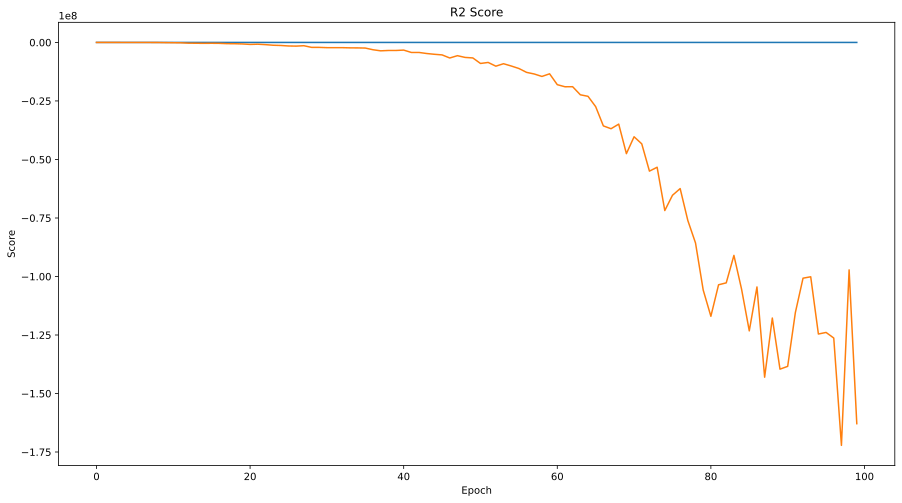

In [118]:
fig, axs = plt.subplots(1,figsize=(15,8))
axs.plot(trainScore)
axs.plot(testScore)
axs.set_title('R2 Score')
axs.set_xlabel('Epoch')
axs.set_ylabel('Score')

plt.show()

In [123]:
trainScore

[0.02468874738151393,
 0.4788183420150527,
 0.49877049511051225,
 0.5089373869941476,
 0.5168579489973182,
 0.5271176343965394,
 0.5281492478255991,
 0.5384185017566487,
 0.543898265963321,
 0.5490641801225934,
 0.5549863469493703,
 0.5629586998231906,
 0.5574481329518706,
 0.5670102515377056,
 0.5722806425800648,
 0.5767031191330114,
 0.5780217982782863,
 0.5783722545464648,
 0.5843795303538886,
 0.5802255246604601,
 0.5917278470424037,
 0.5878944442650463,
 0.5960444346046244,
 0.5947188120473228,
 0.5951554052767927,
 0.601270034002944,
 0.6037334731683405,
 0.6087302534971945,
 0.6100527911452456,
 0.605927088024199,
 0.6042723455149127,
 0.6141759674988548,
 0.6134882926152044,
 0.6164569262605938,
 0.6201836926376888,
 0.6202775113957419,
 0.6215448995929006,
 0.6296904431148507,
 0.6248555582756039,
 0.6283295569256555,
 0.6252418318620365,
 0.6352437359921651,
 0.6258970978017475,
 0.6311482857134117,
 0.6286486278291372,
 0.631643611151283,
 0.6366041600120836,
 0.640951104130